# Simple Image Classification with Neural Networks



## Introduction
This quest will challenge you to build a simple image classifier using neural network building blocks you already know, as well as some new techniques.

## Display 10 random images from the Fashion MNIST data set and annotate the image with the class label

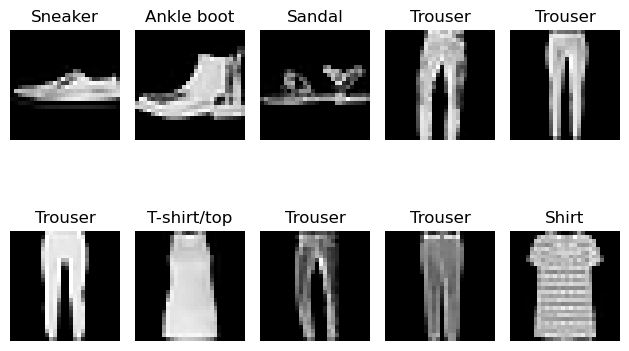

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (_, _) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select 10 random images
indices = np.random.choice(np.arange(X_train.shape[0]), size=10, replace=False)

# Plot each image
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()


## Challenge 1: Build a Fashion MNIST Classifier

* Charger le jeu de données Fashion MNIST.
* Normaliser les valeurs des pixels des images pour qu’elles soient comprises entre 0 et 1.
* Redimensionner les images pour inclure une dimension de canal.
* Définir l’architecture du modèle en utilisant un modèle séquentiel avec deux blocs de convolution, une couche de mise à plat (Flatten), une couche dense cachée et une couche de sortie.
* Compiler le modèle avec l’optimiseur Adam, la perte de cross-entropie catégorielle sparse et la précision comme métrique.
* Entraîner le modèle sur les données d’entraînement pendant 30 époques, en utilisant une fraction des données pour la validation.
* Évaluer le modèle sur le jeu de données de test et imprimer la précision du test.
* Tracer l’historique de l’entraînement pour visualiser la précision de l’entraînement et de la validation au fil des époques.

Epoch 1/30
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5795 - accuracy: 0.7921 - val_loss: 0.3583 - val_accuracy: 0.8713
Epoch 2/30
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3962 - accuracy: 0.8581 - val_loss: 0.3120 - val_accuracy: 0.8826
Epoch 3/30
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3515 - accuracy: 0.8728 - val_loss: 0.2852 - val_accuracy: 0.8920
Epoch 4/30
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3206 - accuracy: 0.8818 - val_loss: 0.2590 - val_accuracy: 0.9035
Epoch 5/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3038 - accuracy: 0.8912 - val_loss: 0.2458 - val_accuracy: 0.9068
Epoch 6/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2852 - accuracy: 0.8961 - val_loss: 0.2432 - val_accuracy: 0.9105
Epoch 7/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2748 - accuracy: 0.9010 - val_loss: 0.2325 - val_ac

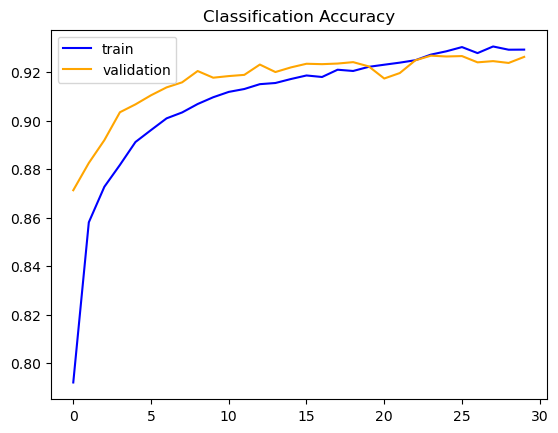

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import History

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_label = dict(zip(range(10), class_names))

# Normalize the pixel values of the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to include a channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Define the model architecture
net = keras.models.Sequential([
    # First convolutional block
    Conv2D(32, kernel_size=3, activation='relu',
           padding='same', input_shape=[28, 28, 1]),
    MaxPooling2D(2),
    Dropout(0.25),
    # Second convolutional block
    Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Dropout(0.25),
    # Flatten the output of the convolutions
    Flatten(),
    # Dense hidden layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
net.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = net.fit(X_train, y_train, epochs=30, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = net.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history


def plot_training_history(history: History):
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'],
             color='orange', label='validation')
    plt.legend()
    plt.show()


# Call the function to plot the training history
plot_training_history(history)
#  il faut 6 min à ce modele pour terminer les 30 epoch avec les 1500


## Challenge 2: Energy Conservation

#### 1er essai
Résumé du texte avec des phrases commençant par un verbe à l'infinitif : 

- **Utiliser** des couches convolutives pour traiter efficacement les données d'image.
- **Réduire** les dimensions spatiales et le nombre de paramètres en utilisant le max pooling.
- **Diminuer** la taille des couches denses finales, avec moins de neurones que dans un réseau entièrement connecté typique.
- **Maintenir** une haute qualité de prédiction tout en réduisant considérablement le temps d'entraînement et la consommation d'énergie grâce à cette réduction de taille.

Epoch 1/30
1500/1500 [==============================] - 15s 10ms/step - loss: 4.0001 - accuracy: 0.5742 - val_loss: 0.9368 - val_accuracy: 0.6938
Epoch 2/30
1500/1500 [==============================] - 15s 10ms/step - loss: 1.3676 - accuracy: 0.6069 - val_loss: 0.8092 - val_accuracy: 0.7459
Epoch 3/30
1500/1500 [==============================] - 13s 9ms/step - loss: 1.1499 - accuracy: 0.6418 - val_loss: 0.6587 - val_accuracy: 0.8013
Epoch 4/30
1500/1500 [==============================] - 13s 9ms/step - loss: 1.0734 - accuracy: 0.6718 - val_loss: 0.7179 - val_accuracy: 0.7955
Epoch 5/30
1500/1500 [==============================] - 14s 9ms/step - loss: 1.0699 - accuracy: 0.6699 - val_loss: 0.6864 - val_accuracy: 0.7956
Epoch 6/30
1500/1500 [==============================] - 13s 9ms/step - loss: 1.0014 - accuracy: 0.6912 - val_loss: 0.5821 - val_accuracy: 0.7951
Epoch 7/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.8867 - accuracy: 0.7070 - val_loss: 0.5313 - val_

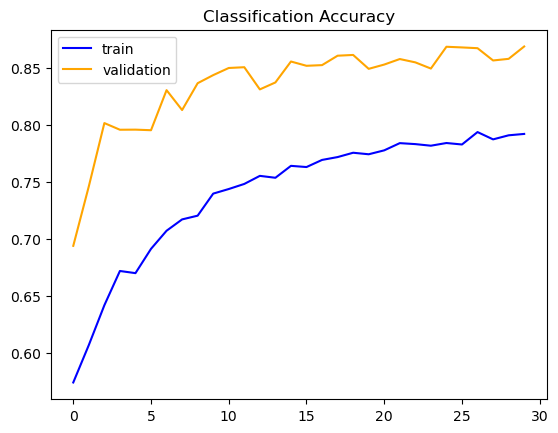

In [6]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model


# En supposant que la forme d'entrée est (28, 28, 1) pour les images en niveaux de gris
inputs = Input(shape=(28, 28, 1))

# Bloc convolutif efficace
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)

# Couches denses avec moins de neurones
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Création et compilation du modèle
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = net.fit(X_train, y_train, epochs=30, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = net.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history


def plot_training_history(history: History):
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'],
             color='orange', label='validation')
    plt.legend()
    plt.show()


# Call the function to plot the training history
plot_training_history(history)
#  il faut 6,40 min à ce modele pour terminer les 30 epoch avec les 1500


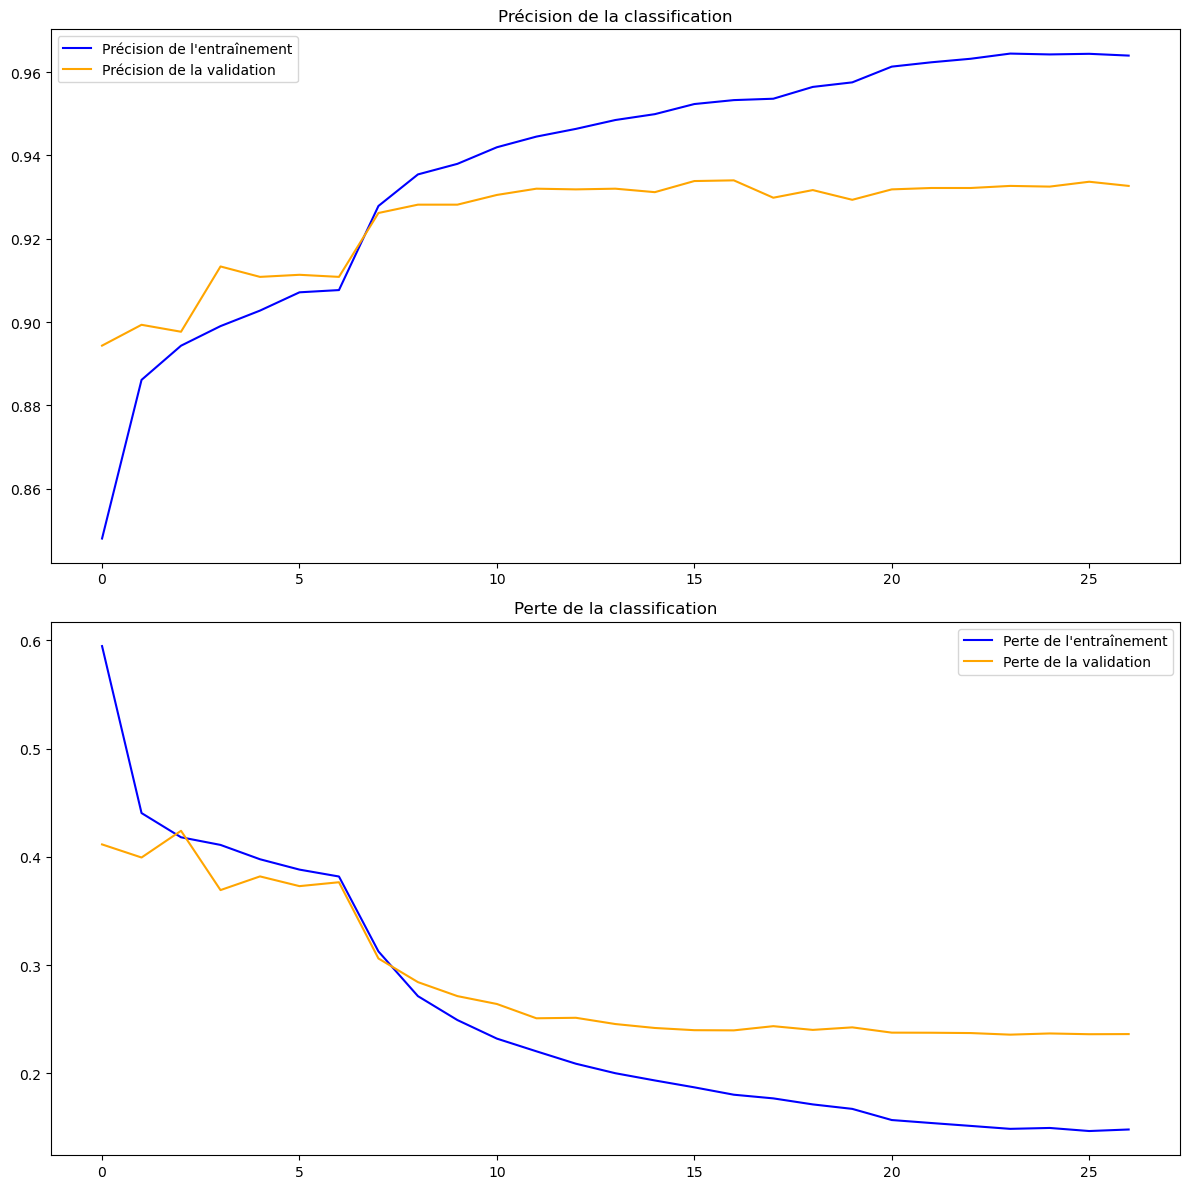

In [22]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    # Tracer la précision de l'entraînement et de la validation
    ax1.plot(history.history['accuracy'], color='blue',
             label='Précision de l\'entraînement')
    ax1.plot(history.history['val_accuracy'],
             color='orange', label='Précision de la validation')
    ax1.set_title('Précision de la classification')
    ax1.legend()

    # Tracer la perte de l'entraînement et de la validation
    ax2.plot(history.history['loss'], color='blue',
             label='Perte de l\'entraînement')
    ax2.plot(history.history['val_loss'],
             color='orange', label='Perte de la validation')
    ax2.set_title('Perte de la classification')
    ax2.legend()

    plt.tight_layout()
    plt.show()


# Appeler la fonction pour tracer l'historique de l'entraînement
plot_training_history(history)


2éme essai:
* intègration des techniques visant à accélérer l'entraînement et à améliorer la performance sans augmenter inutilement la complexité du modèle.


- **Optimiser** les couches convolutives pour extraire les caractéristiques des images tout en évitant une complexité excessive.
- **Réduire** la taille de l'image si la résolution le permet pour diminuer le nombre de paramètres.
- **Ajuster** les hyperparamètres du réseau pour trouver le meilleur équilibre entre la vitesse d'apprentissage et la performance.
- **Utiliser** des couches denses avec moins de neurones pour diminuer la complexité du modèle.
- **Améliorer** la généralisation et potentiellement réduire le surajustement sans augmenter la complexité du modèle en utilisant l'augmentation de données (Data Augmentation).
- **Accélérer** la convergence et permettre d'utiliser un taux d'apprentissage plus élevé en utilisant la normalisation par lots (Batch Normalization).
- **Entraîner** le modèle sur des lots plus petits pour accélérer l'entraînement et utiliser moins de mémoire.
- **Terminer** l'entraînement dès que la précision de validation cesse de s'améliorer en utilisant un callback d'arrêt précoce (Early Stopping).
- **Réduire** la précision des calculs en utilisant des types de données en virgule flottante avec moins de précision, comme float16, si votre matériel le permet.
- **Envisager** des architectures de réseau de neurones plus légères spécialement conçues pour les appareils mobiles, comme MobileNet ou SqueezeNet. 



Epoch 1/30
1688/1688 [==============================] - 16s 8ms/step - loss: 0.4341 - accuracy: 0.8473 - val_loss: 0.2889 - val_accuracy: 0.8917 - lr: 0.0010
Epoch 2/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3101 - accuracy: 0.8874 - val_loss: 0.2757 - val_accuracy: 0.9012 - lr: 0.0010
Epoch 3/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2790 - accuracy: 0.8999 - val_loss: 0.2411 - val_accuracy: 0.9098 - lr: 0.0010
Epoch 4/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2599 - accuracy: 0.9048 - val_loss: 0.2406 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 5/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2414 - accuracy: 0.9123 - val_loss: 0.2768 - val_accuracy: 0.9045 - lr: 0.0010
Epoch 6/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2291 - accuracy: 0.9156 - val_loss: 0.2414 - val_accuracy: 0.9132 - lr: 0.0010
Epoch 7/30
1688/1688 [==============================

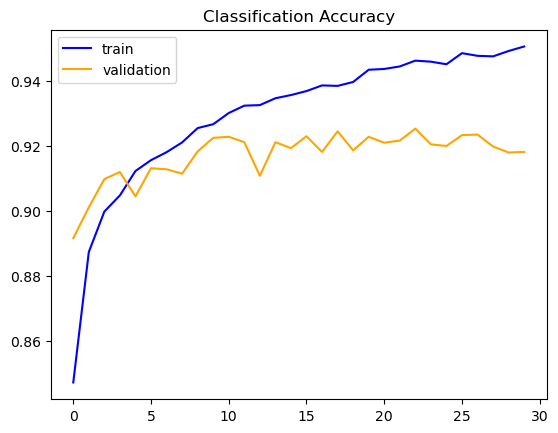

In [13]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values of the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to include a channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

inputs = Input(shape=(28, 28, 1))

# Bloc convolutif simplifié
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = BatchNormalization()(x)

# Couches denses simplifiées
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks d'arrêt précoce et de réduction du taux d'apprentissage
early_stopping = EarlyStopping(
    monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Entraînement avec validation, arrêt précoce et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, epochs=30,
                    validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history


def plot_training_history(history):
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'],
             color='orange', label='validation')
    plt.legend()
    plt.show()


# Call the function to plot the training history
plot_training_history(history)
# 7 min pour ce modele qui est moins bon car il fait de l'overfiting


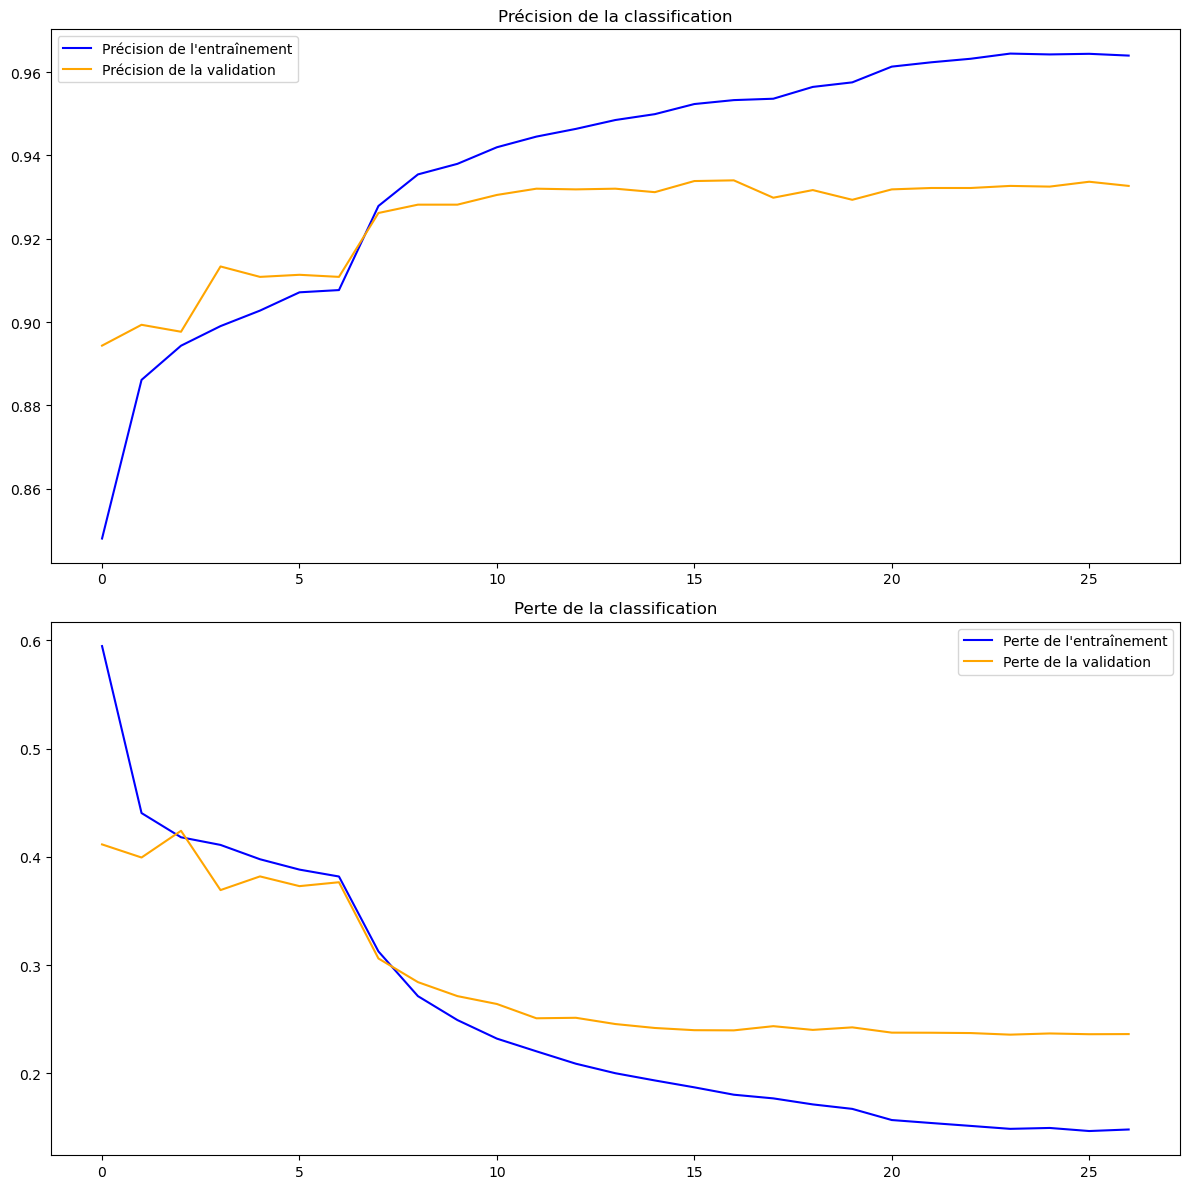

In [21]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    # Tracer la précision de l'entraînement et de la validation
    ax1.plot(history.history['accuracy'], color='blue',
             label='Précision de l\'entraînement')
    ax1.plot(history.history['val_accuracy'],
             color='orange', label='Précision de la validation')
    ax1.set_title('Précision de la classification')
    ax1.legend()

    # Tracer la perte de l'entraînement et de la validation
    ax2.plot(history.history['loss'], color='blue',
             label='Perte de l\'entraînement')
    ax2.plot(history.history['val_loss'],
             color='orange', label='Perte de la validation')
    ax2.set_title('Perte de la classification')
    ax2.legend()

    plt.tight_layout()
    plt.show()


# Appeler la fonction pour tracer l'historique de l'entraînement
plot_training_history(history)


#### 3 éme essai

* Le nombre 1688  est le nombre total de lots (ou “batches”) des données d’entraînement. 
- Lors de l’entraînement d’un modèle de réseau de neurones, il est courant de diviser l’ensemble de données d’entraînement en lots plus petits pour faciliter l’entraînement.

*  la taille du lot (ou “batch size”) lors de l’appel à la méthode fit, Keras utilise une taille de lot par défaut de 32.

*  le nombre 1688 est le résultat de la division du nombre total d’échantillons l'ensemble d’entraînement par la taille du lot (32). Par exemple, si vous avez 54000 échantillons d’entraînement, alors 54000 divisé par 32 est environ 1688.

Chaque époque d’entraînement parcourt tous les lots d’entraînement une fois. Donc, “Epoch 1/30 1688/1688” signifie que le modèle a terminé la première époque d’entraînement en passant par tous les 1688 lots.

Epoch 1/30
1688/1688 [==============================] - 16s 8ms/step - loss: 0.4297 - accuracy: 0.8473 - val_loss: 0.2804 - val_accuracy: 0.8953 - lr: 0.0010
Epoch 2/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3090 - accuracy: 0.8883 - val_loss: 0.2729 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 3/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2758 - accuracy: 0.8999 - val_loss: 0.2699 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 4/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2562 - accuracy: 0.9054 - val_loss: 0.2567 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 5/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2436 - accuracy: 0.9100 - val_loss: 0.2702 - val_accuracy: 0.9113 - lr: 0.0010
Epoch 6/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2286 - accuracy: 0.9157 - val_loss: 0.2243 - val_accuracy: 0.9188 - lr: 0.0010
Epoch 7/30
1688/1688 [==============================

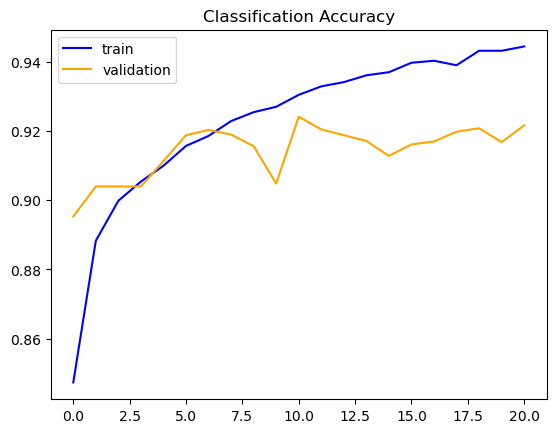

In [15]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping

inputs = Input(shape=(28, 28, 1))

# Bloc convolutif simplifié
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = BatchNormalization()(x)

# Couches denses simplifiées
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Callbacks d'arrêt précoce et de réduction du taux d'apprentissage
early_stopping = EarlyStopping(
    monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Entraînement avec validation, arrêt précoce et réduction du taux d'apprentissage
history = model.fit(X_train, y_train, epochs=30,
                    validation_split=0.1, callbacks=[early_stopping, reduce_lr])


# Evaluate the model on the test set
test_loss, test_accuracy = net.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history


def plot_training_history(history: History):
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'],
             color='orange', label='validation')
    plt.legend()
    plt.show()


# Call the function to plot the training history
plot_training_history(history)
#  il faut 6,40 min à ce modele pour terminer les 30 epoch avec les 1500

# 4.47 min  et un résultat moyen


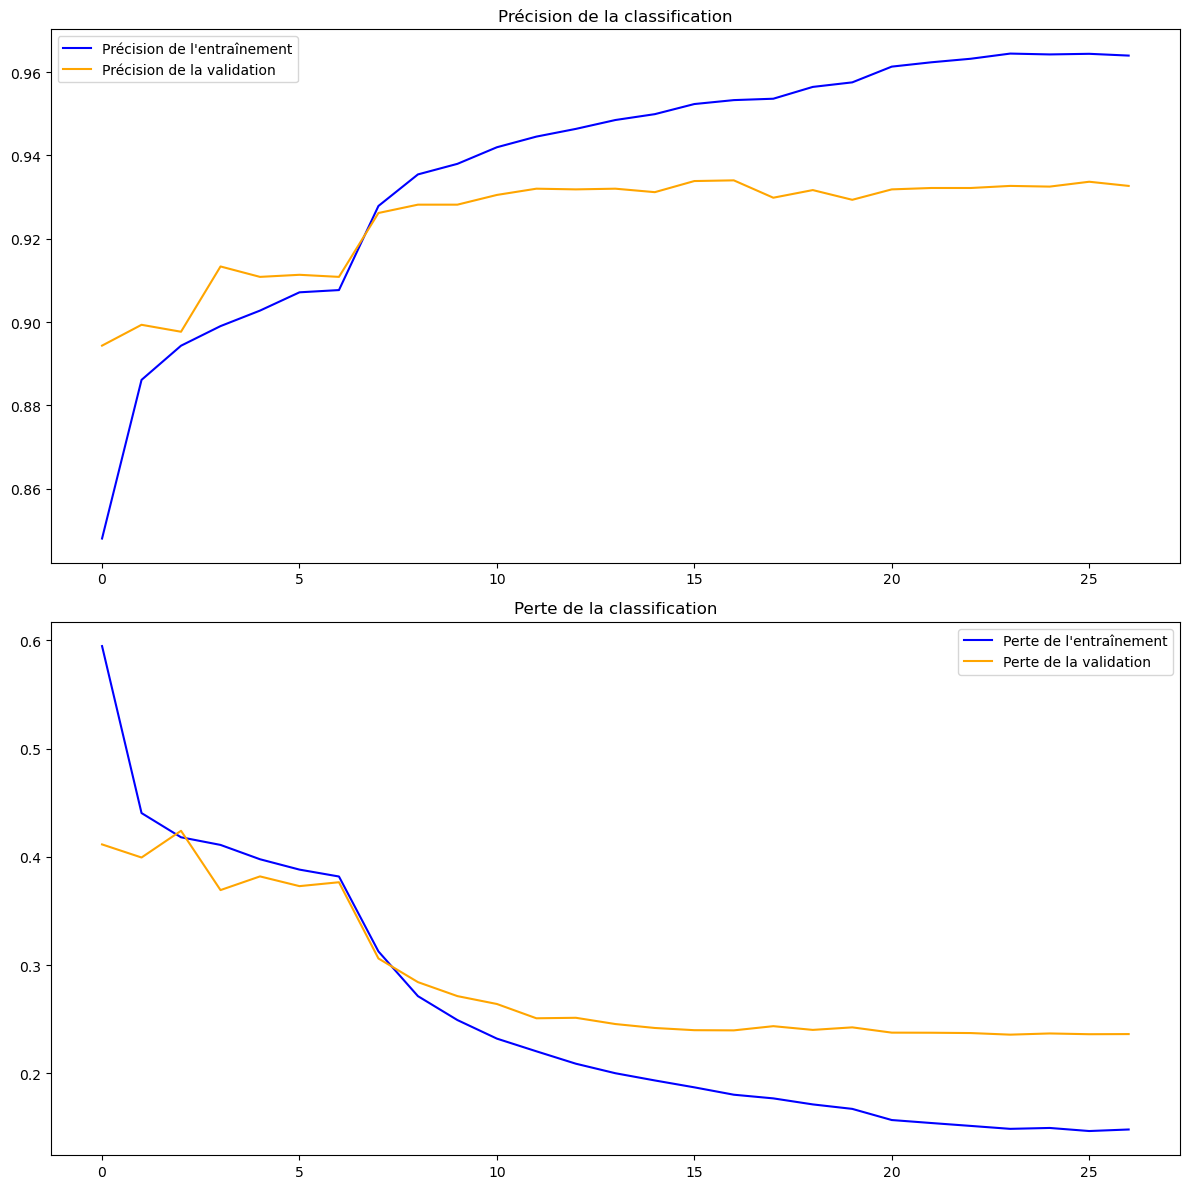

In [20]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    # Tracer la précision de l'entraînement et de la validation
    ax1.plot(history.history['accuracy'], color='blue',
             label='Précision de l\'entraînement')
    ax1.plot(history.history['val_accuracy'],
             color='orange', label='Précision de la validation')
    ax1.set_title('Précision de la classification')
    ax1.legend()

    # Tracer la perte de l'entraînement et de la validation
    ax2.plot(history.history['loss'], color='blue',
             label='Perte de l\'entraînement')
    ax2.plot(history.history['val_loss'],
             color='orange', label='Perte de la validation')
    ax2.set_title('Perte de la classification')
    ax2.legend()

    plt.tight_layout()
    plt.show()


# Appeler la fonction pour tracer l'historique de l'entraînement
plot_training_history(history)


4 émé essai


* L’évaluation du modèle utilise net.evaluate qui devrait être model.evaluate car net n’est pas défini dans l’extrait de code donné.
* Assurer que X_train, y_train, X_test et y_test sont définis et prétraités correctement avant d’exécuter ce code.
* L’objet History dans la fonction plot_training_history ne devrait pas être typé car Python ne nécessite pas de typage explicite. Si vous utilisez des indications de type, assurez-vous d’importer History de keras.* callbacks.
* Envisager d’utiliser une architecture de modèle plus efficace, de réduire la taille du modèle ou d’utiliser des techniques telles que l’apprentissage par transfert si cela est approprié pour réduire le temps * d’entraînement sans compromettre les performances du modèle.
* La fonction plot_training_history manque d’une instruction d’importation pour matplotlib.pyplot.

Epoch 1/30
1688/1688 [==============================] - 16s 8ms/step - loss: 0.4249 - accuracy: 0.8504 - val_loss: 0.2974 - val_accuracy: 0.8855 - lr: 0.0010
Epoch 2/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3079 - accuracy: 0.8882 - val_loss: 0.4069 - val_accuracy: 0.8638 - lr: 0.0010
Epoch 3/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2763 - accuracy: 0.8982 - val_loss: 0.2576 - val_accuracy: 0.9058 - lr: 0.0010
Epoch 4/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2591 - accuracy: 0.9047 - val_loss: 0.2485 - val_accuracy: 0.9108 - lr: 0.0010
Epoch 5/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2436 - accuracy: 0.9108 - val_loss: 0.2385 - val_accuracy: 0.9147 - lr: 0.0010
Epoch 6/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2293 - accuracy: 0.9166 - val_loss: 0.2501 - val_accuracy: 0.9132 - lr: 0.0010
Epoch 7/30
1688/1688 [==============================

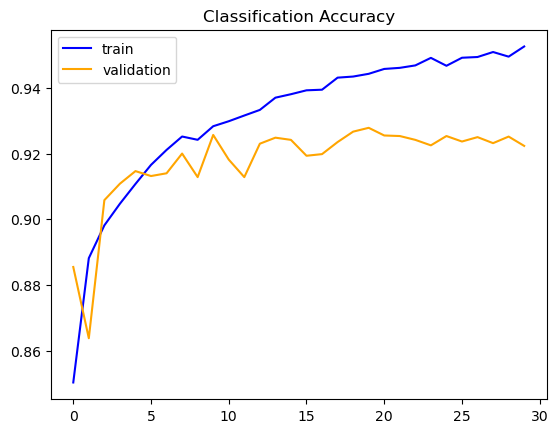

In [16]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values of the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to include a channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

inputs = Input(shape=(28, 28, 1))

# Convolutional block
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = BatchNormalization()(x)

# Dense layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(
    monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Training with validation, early stopping, and learning rate reduction
history = model.fit(X_train, y_train, epochs=30,
                    validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history


def plot_training_history(history):
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'],
             color='orange', label='validation')
    plt.legend()
    plt.show()


# Call the function to plot the training history
plot_training_history(history)
#  7min et un mauvais résultat


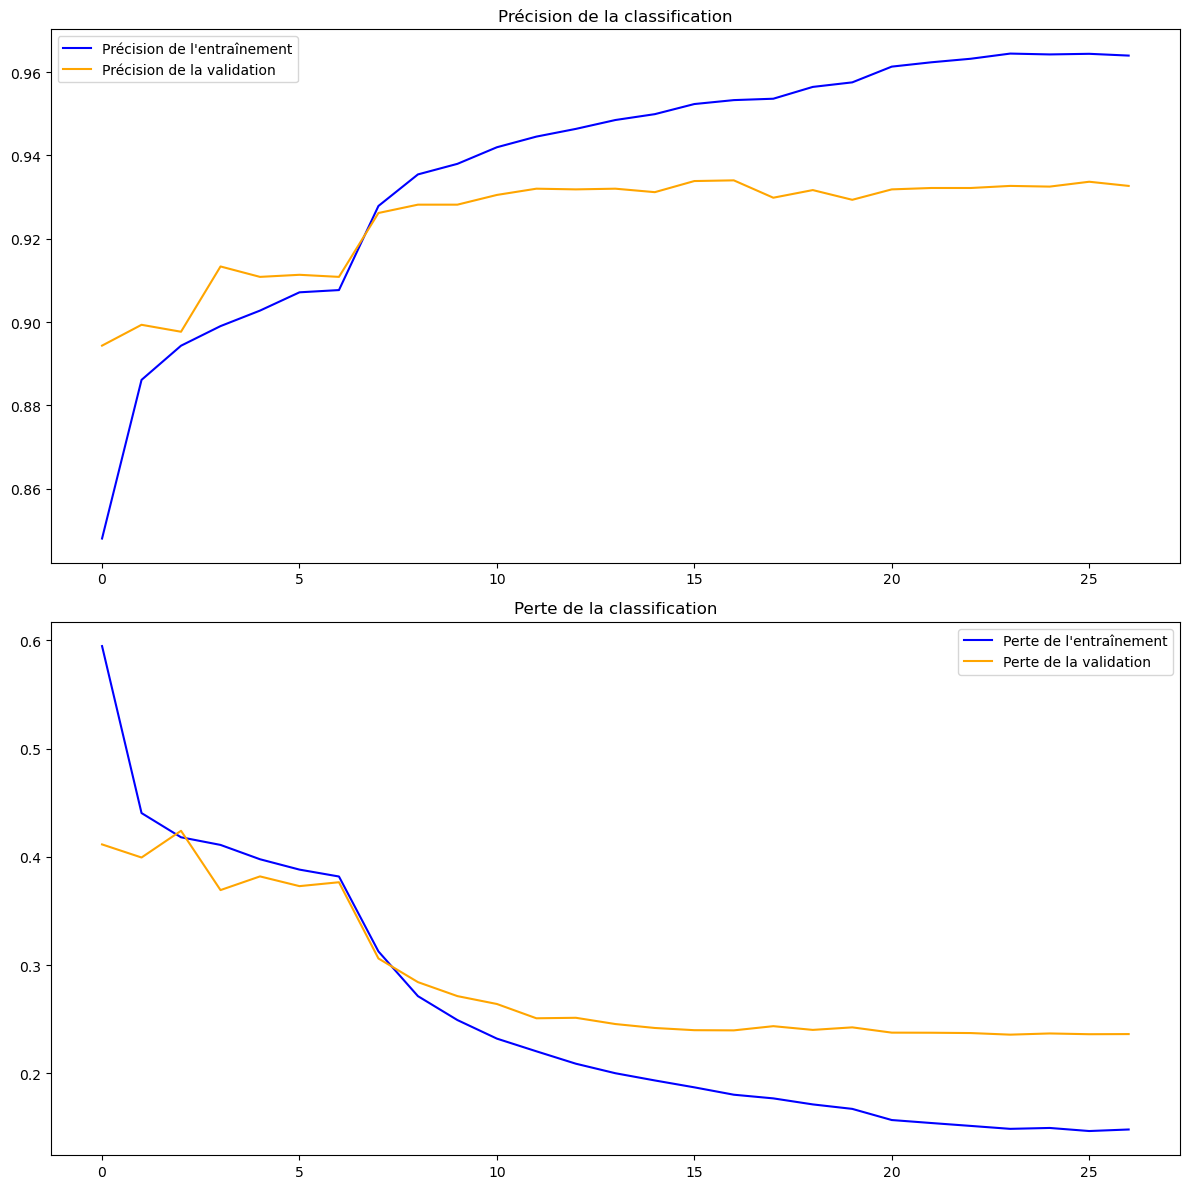

In [19]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    # Tracer la précision de l'entraînement et de la validation
    ax1.plot(history.history['accuracy'], color='blue',
             label='Précision de l\'entraînement')
    ax1.plot(history.history['val_accuracy'],
             color='orange', label='Précision de la validation')
    ax1.set_title('Précision de la classification')
    ax1.legend()

    # Tracer la perte de l'entraînement et de la validation
    ax2.plot(history.history['loss'], color='blue',
             label='Perte de l\'entraînement')
    ax2.plot(history.history['val_loss'],
             color='orange', label='Perte de la validation')
    ax2.set_title('Perte de la classification')
    ax2.legend()

    plt.tight_layout()
    plt.show()


# Appeler la fonction pour tracer l'historique de l'entraînement
plot_training_history(history)


#### 5 éme essai

Epoch 1/30
1688/1688 [==============================] - 16s 9ms/step - loss: 0.5948 - accuracy: 0.8480 - val_loss: 0.4115 - val_accuracy: 0.8943 - lr: 0.0010
Epoch 2/30
1688/1688 [==============================] - 15s 9ms/step - loss: 0.4405 - accuracy: 0.8861 - val_loss: 0.3994 - val_accuracy: 0.8993 - lr: 0.0010
Epoch 3/30
1688/1688 [==============================] - 14s 9ms/step - loss: 0.4181 - accuracy: 0.8943 - val_loss: 0.4241 - val_accuracy: 0.8977 - lr: 0.0010
Epoch 4/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.4110 - accuracy: 0.8990 - val_loss: 0.3693 - val_accuracy: 0.9133 - lr: 0.0010
Epoch 5/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3978 - accuracy: 0.9027 - val_loss: 0.3819 - val_accuracy: 0.9108 - lr: 0.0010
Epoch 6/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3882 - accuracy: 0.9071 - val_loss: 0.3729 - val_accuracy: 0.9113 - lr: 0.0010
Epoch 7/30
1688/1688 [==============================

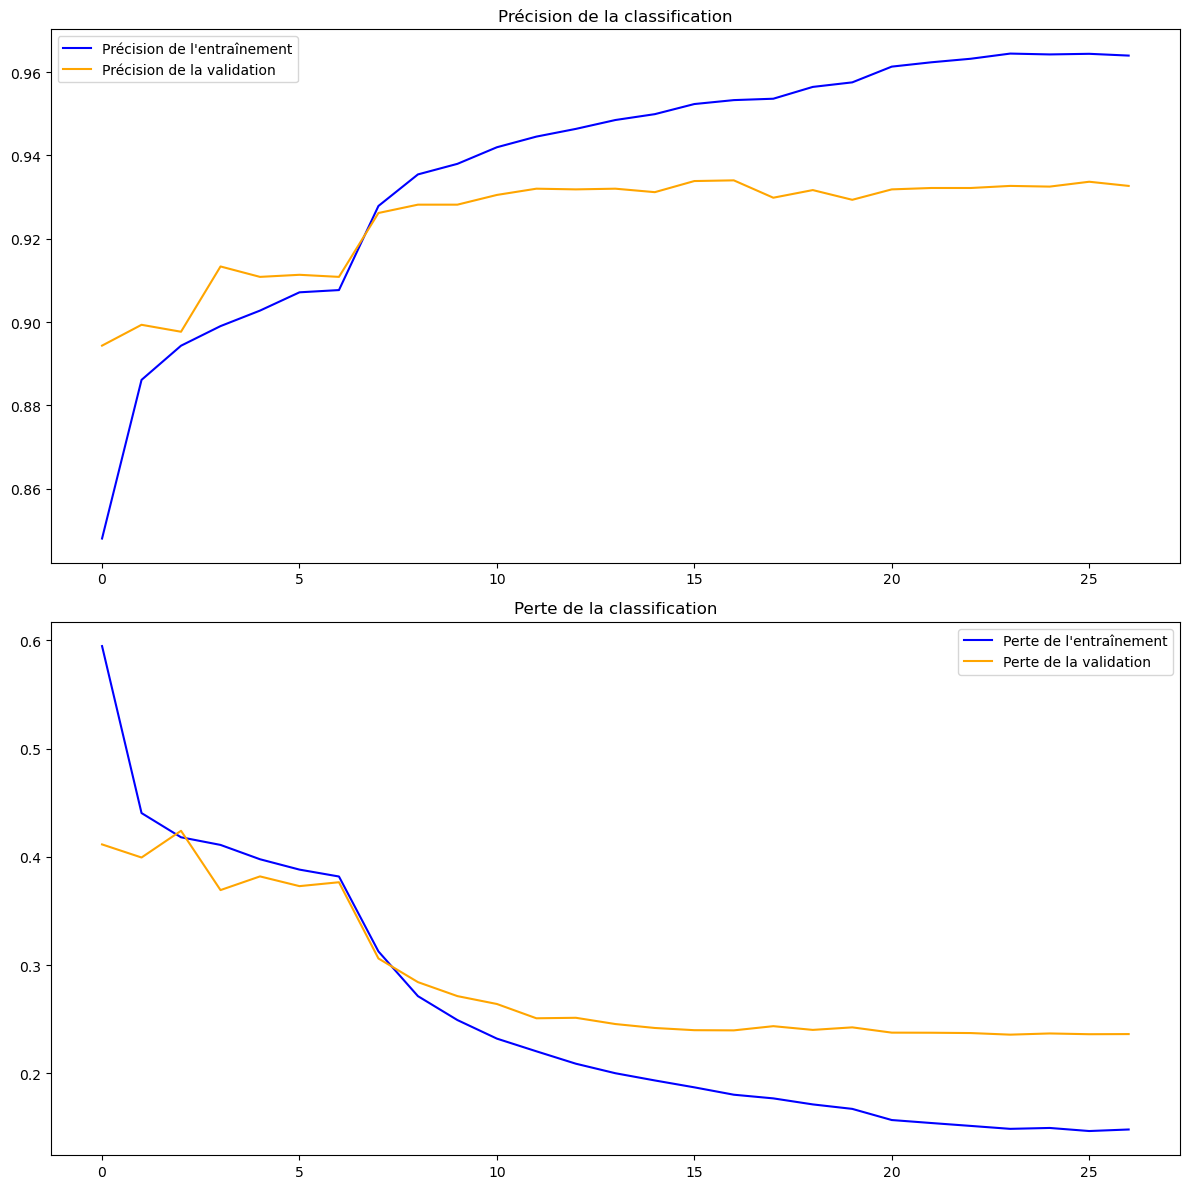

In [18]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values of the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to include a channel dimension
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

inputs = Input(shape=(28, 28, 1))

# Convolutional block
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = BatchNormalization()(x)

# Dense layers with L2 regularization
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)  # Keep the dropout layer to combat overfitting
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback for learning rate adjustment
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)


# Training with validation, early stopping, and learning rate reduction
history = model.fit(X_train, y_train, epochs=30,
                    validation_split=0.1, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history
# def plot_training_history(history):
#     plt.title('Classification Accuracy')
#     plt.plot(history.history['accuracy'], color='blue', label='train')
#     plt.plot(history.history['val_accuracy'], color='orange', label='validation')
#     plt.legend()
#     plt.show()

# # Call the function to plot the training history
# plot_training_history(history)
# #  7min et un mauvais résultat


def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    # Tracer la précision de l'entraînement et de la validation
    ax1.plot(history.history['accuracy'], color='blue',
             label='Précision de l\'entraînement')
    ax1.plot(history.history['val_accuracy'],
             color='orange', label='Précision de la validation')
    ax1.set_title('Précision de la classification')
    ax1.legend()

    # Tracer la perte de l'entraînement et de la validation
    ax2.plot(history.history['loss'], color='blue',
             label='Perte de l\'entraînement')
    ax2.plot(history.history['val_loss'],
             color='orange', label='Perte de la validation')
    ax2.set_title('Perte de la classification')
    ax2.legend()

    plt.tight_layout()
    plt.show()


# Appeler la fonction pour tracer l'historique de l'entraînement
plot_training_history(history)
